## Initial Testing

In [1]:
import numpy as np
import tslearn
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.metrics import dtw

# Create the time series sequences
A1 = ['a', 'b', 'c', 'd', 'e']
T1 = [1, 2, 3, 4, 5]
A2 = ['a', 'e', 'b', 'g', 'c', 'a', 'h', 'd']
T2 = [1, 2, 3, 4, 5, 6, 7, 8]

# Convert the time series sequences into numpy arrays
A1 = np.array(A1).reshape(-1, 1)
T1 = np.array(T1).reshape(-1, 1)
A2 = np.array(A2).reshape(-1, 1)
T2 = np.array(T2).reshape(-1, 1)

# Create the time series dataset
time_series = [np.hstack((A1, T1)), np.hstack((A2, T2))]

# Transform the time series into a symbolic representation using Piecewise Aggregate Approximation (PAA)
paa = PiecewiseAggregateApproximation(n_segments=3)
X = paa.fit_transform(time_series)

# Calculate the LCS between the two time series
distance, path = dtw(X[0], X[1], metric="lcs", step_pattern=None, threshold=2, return_path=True)

# Extract the LCS events and their respective time stamps
lcs_events = [A1[i] for i, j in path]
lcs_timestamps = [T1[i] for i, j in path]

print("LCS events: ", lcs_events)
print("LCS timestamps: ", lcs_timestamps)


c:\Users\pedro\.virtualenvs\DTvirtenv-blc9_2om\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
c:\Users\pedro\.virtualenvs\DTvirtenv-blc9_2om\lib\site-packages\sklearn\utils\_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)


ValueError: Expected 2D array, got 1D array instead:
array=[array([['a', '1'],
        ['b', '2'],
        ['c', '3'],
        ['d', '4'],
        ['e', '5']], dtype='<U11') array([['a', '1'],
                                          ['e', '2'],
                                          ['b', '3'],
                                          ['g', '4'],
                                          ['c', '5'],
                                          ['a', '6'],
                                          ['h', '7'],
                                          ['d', '8']], dtype='<U11')].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [2]:
import numpy as np
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.metrics import lcss_path

# Create the time series sequences
A1 = ['a', 'b', 'c', 'd', 'e']
T1 = [1, 2, 3, 4, 5]
A2 = ['a', 'e', 'b', 'g', 'c', 'a', 'h', 'd']
T2 = [1, 2, 3, 4, 5, 6, 7, 8]

# Convert the time series sequences into numpy arrays
A1 = np.array(A1).reshape(-1, 1)
T1 = np.array(T1).reshape(-1, 1)
A2 = np.array(A2).reshape(-1, 1)
T2 = np.array(T2).reshape(-1, 1)

# Create the time series dataset
time_series = [np.hstack((A1, T1)), np.hstack((A2, T2))]

# Transform the time series into a symbolic representation using Piecewise Aggregate Approximation (PAA)
paa = PiecewiseAggregateApproximation(n_segments=3)
X = paa.fit_transform(time_series)

# Calculate the LCSSR between the two time series
distance, path = lcss_path(X[0], X[1], metric="lcs", gamma=2, return_path=True)

# Extract the LCSSR events and their respective time stamps
lcssr_events = [A1[i] for i, j in path]
lcssr_timestamps = [T1[i] for i, j in path]

print("LCSSR events: ", lcssr_events)
print("LCSSR timestamps: ", lcssr_timestamps)


c:\Users\pedro\.virtualenvs\DTvirtenv-blc9_2om\lib\site-packages\sklearn\utils\_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)


ValueError: Expected 2D array, got 1D array instead:
array=[array([['a', '1'],
        ['b', '2'],
        ['c', '3'],
        ['d', '4'],
        ['e', '5']], dtype='<U11') array([['a', '1'],
                                          ['e', '2'],
                                          ['b', '3'],
                                          ['g', '4'],
                                          ['c', '5'],
                                          ['a', '6'],
                                          ['h', '7'],
                                          ['d', '8']], dtype='<U11')].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [3]:
import numpy as np
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.metrics import lcss_path

# Define your two time series
time_series1 = np.array([1, 2, 3, 4, 5])
time_series2 = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# Reshape your time series into a 2D array
time_series1 = time_series1.reshape(-1, 1)
time_series2 = time_series2.reshape(-1, 1)

# Create an instance of PiecewiseAggregateApproximation
paa = PiecewiseAggregateApproximation(n_segments=3)

# Apply PAA to both time series
X1 = paa.fit_transform(time_series1)
X2 = paa.fit_transform(time_series2)

# Compute the LCSS with a time threshold of 2
lcss_dist, lcss_path_ = lcss_path(X1, X2, dist='euclidean', band_rad=2)

# Print the LCSS distance
print("LCSS distance:", lcss_dist)


c:\Users\pedro\.virtualenvs\DTvirtenv-blc9_2om\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 5 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
c:\Users\pedro\.virtualenvs\DTvirtenv-blc9_2om\lib\site-packages\tslearn\piecewise\piecewise.py:152: RuntimeWarning: Mean of empty slice.
  X_transformed[i_ts, i_seg, :] = segment.mean(axis=0)
c:\Users\pedro\.virtualenvs\DTvirtenv-blc9_2om\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\pedro\.virtualenvs\DTvirtenv-blc9_2om\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 8 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
c:\Users\pedro\.virtualenvs\DTvirtenv-blc9_2om\lib\site-packages\tslearn\piecewise\piecewise.py:152: RuntimeWarning: Mean of empty slice.
  X_transforme

TypeError: lcss_path() got an unexpected keyword argument 'dist'

In [4]:
import numpy as np
from tslearn.metrics import lcss_path

S1 = np.array([["A", 1], ["B", 2], ["C", 3]])
S2 = np.array([["A", 2], ["C", 3], ["D", 4]])

lcs_value, lcs_indices = lcss_path(S1[:,0], S2[:,0], S1[:,1], S2[:,1])

print("LCS Value: ", lcs_value)
print("LCS Indices: ", lcs_indices)


ValueError: could not convert string to float: 'A'

In [14]:
def LCSSR(vector1, vector2, eps, delta_t):
    m, n = len(vector1), len(vector2)
    dp = [[0 for j in range(n + 1)] for i in range(m + 1)]
    lcss = []
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if abs(vector1[i-1][0] - vector2[j-1][0]) <= eps and abs(vector1[i-1][1] - vector2[j-1][1]) <= delta_t:
                dp[i][j] = dp[i-1][j-1] + 1
                lcss.append(vector1[i-1])
                break
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    return lcss


vector1 = [[10,1],[13,2],[15,3]]
vector2 = [[10,2],[15,3],[17,4]]
eps = 0
delta_t = 1

result = LCSSR(vector1, vector2, eps, delta_t)
print(result)


[[10, 1], [15, 3]]


In [7]:
def LCSSR(seq1, seq2, eps, delta_t):
    # Create an empty list to store the longest common subsequence (LCS)
    LCS = []
    # Store the length of both sequences
    m, n = len(seq1), len(seq2)
    # Create a 2D array with m+1 rows and n+1 columns to store the lengths of the LCS
    dp = [[0] * (n + 1) for i in range(m + 1)]
    # Loop through each element in seq1
    for i in range(1, m + 1):
        # Loop through each element in seq2
        for j in range(1, n + 1):
            # Check if the events and the time difference between the events are within the given eps and delta_t limits
            if abs(seq1[i - 1][0] - seq2[j - 1][0]) <= eps and abs(seq1[i - 1][1] - seq2[j - 1][1]) <= delta_t:
                # If the events and time difference are within the limits, increment the length of the LCS by 1
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                # If the events and time difference are not within the limits, find the maximum of the LCS length from the previous row or previous column
                dp[i][j] = max(dp[i][j - 1], dp[i - 1][j])
    # Loop through the dp array in reverse order to get the LCS
    i, j = m, n
    while i > 0 and j > 0:
        # Check if the events and time difference are within the given eps and delta_t limits
        if abs(seq1[i - 1][0] - seq2[j - 1][0]) <= eps and abs(seq1[i - 1][1] - seq2[j - 1][1]) <= delta_t:
            # If the events and time difference are within the limits, add the event to the LCS list
            LCS.append(seq1[i - 1])
            # Decrement i and j to move to the previous elements in both sequences
            i -= 1
            j -= 1
        else:
            # If the events and time difference are not within the limits, move to the cell with the maximum length in the dp array
            if dp[i][j - 1] > dp[i - 1][j]:
                j -= 1
            else:
                i -= 1
    # Reverse the LCS list to get the correct order of events
    LCS = LCS[::-1]
    # Return the LCS list
    return LCS


vector1 = [[10,1],[13,2],[15,3]]
vector2 = [[10,2],[15,3],[17,4]]
eps = 1
delta_t = 1

result = LCSSR(vector1, vector2, eps, delta_t)
print(result)

[[10, 1], [15, 3]]


In [12]:
n=5
m=2
dp = [[0] * (n + 1) for i in range(m + 1)]

for i in range(len(dp)):
    print(dp[i])

[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


## Testing the chosen method

In [70]:
def LCSSR(vector1, vector2, delta_t, eps = None, order = False, seq_string = False):
    flag_str = False
    if type(vector1[0][0]) == str and seq_string == False:
        flag_str = True
        eps = 0
        for i in range(len(vector1)):
            vector1[i][0] = ord(vector1[i][0])

        for j in range(len(vector2)):
            vector2[j][0] = ord(vector2[j][0])

    if seq_string == True:
        #### MaquinaID_Status_PartID ####
        # MaquinaID = str 1 to 9
        # Status = 1 (started) or 0 (finished)
        # Part ID = the rest of the string
        # M1 started P15: 1115

        for i in range(len(vector1)):
            for j in range(len(vector1[i][0])):
                if vector1[i][0][j] == "s": vector1[i][0][j] = "1"

                elif vector1[i][0][j] == "f": vector1[i][0][j] = "0"

            vector1[i][0] = int(vector1[i][0])

        for i in range(len(vector2)):
            for j in range(len(vector2[i][0])):
                if vector2[i][0][j] == "s": vector2[i][0][j] = "1"

                elif vector2[i][0][j] == "f": vector2[i][0][j] = "0"
            
            vector2[i][0] = int(vector2[i][0])

        print(f"vector1: {vector1}")
        print(f"vector2: {vector2}")
            

        


    # initialize the lengths of the two input vectors
    m, n = len(vector1), len(vector2)
    
    # create a 2D dp array with m+1 rows and n+1 columns,
    # where each cell stores the length of the longest common sub-sequence between 
    # the prefixes of the two input vectors
    dp = [[0 for j in range(n + 1)] for i in range(m + 1)]
    
    # initialize an empty list to store the events that belong to the longest common sub-sequence
    lcss = []
    jstart = 1
    # loop through each event in vector1
    for i in range(1, m + 1):
        # loop through each event in vector2
        for j in range(jstart, n + 1):
            # check if the current events in vector1 and vector2 are within the eps and delta_t threshold,
            # and if the time difference between them is less than or equal to delta_t
            if abs(vector1[i-1][0] - vector2[j-1][0]) <= eps and abs(vector1[i-1][1] - vector2[j-1][1]) <= delta_t:
                # if the current events match, update the dp cell with the value from the previous cell + 1
                dp[i][j] = dp[i-1][j-1] + 1
                # add the current event from vector1 to the lcss list
                lcss.append(vector1[i-1])

                #--- Mark the j used, the next iteration will look from this j to forward
                if order == True:
                    jstart = j

                # break from the inner loop
                break
            else:
                # if the events don't match, update the dp cell with the max value from the previous cells
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    
    #--- Similarity Indicator
    indicator = len(lcss) / min(m,n)


    #--- If it was a string, convert it back to string
    if flag_str == True:
        for i in range(len(lcss)):
            lcss[i][0] = chr(lcss[i][0])

    # return the longest common sub-sequence
    return lcss, indicator


In [65]:
string = "ABC"
for char in string:
    print(char)

string[0]

A
B
C


'A'

### Example 1: LCSS for str without time

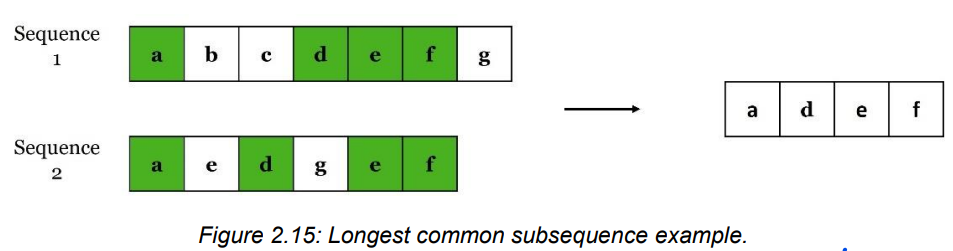

In [57]:
S1 = [["A", 1], ["B",2], ["C", 3], ["D", 4], ["E", 5], ["F", 6], ["G", 7]]
S2 = [["A", 1], ["E", 2], ["D", 3], ["G", 4], ["E", 5], ["F", 6]]

(lcss_list, indicator) = LCSSR(S1, S2, 1000)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [['A', 1], ['D', 4], ['E', 5], ['F', 6], ['G', 7]]
Indicator: 0.8333333333333334


### Example 2: LCSS No time and with time comparing

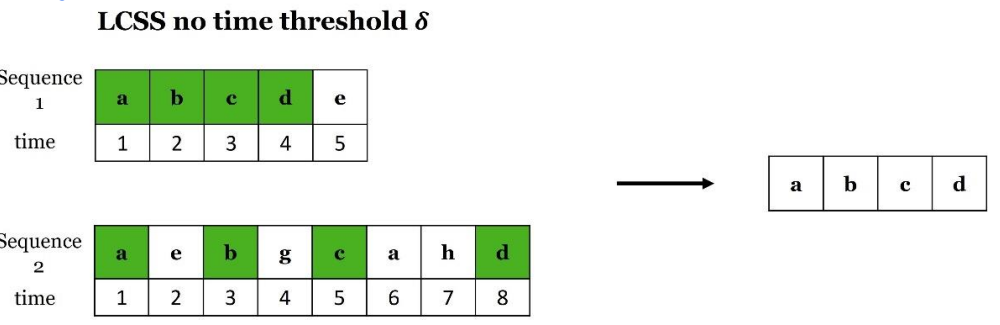

Not ordered

In [52]:
S1 = [["A", 1], ["B",2], ["C", 3], ["D", 4], ["E", 5]]
S2 = [["A", 1], ["E", 2], ["B", 3], ["G", 4], ["C", 5], ["A", 6], ["H", 7], ["D", 8]]

(lcss_list, indicator) = LCSSR(S1, S2, 1000)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [['A', 1], ['B', 2], ['C', 3], ['D', 4], ['E', 5]]
Indicator: 1.0


Ordered

In [53]:
S1 = [["A", 1], ["B",2], ["C", 3], ["D", 4], ["E", 5]]
S2 = [["A", 1], ["E", 2], ["B", 3], ["G", 4], ["C", 5], ["A", 6], ["H", 7], ["D", 8]]

(lcss_list, indicator) = LCSSR(S1, S2, 1000, order= True)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [['A', 1], ['B', 2], ['C', 3], ['D', 4]]
Indicator: 0.8


##### Testing inverting the sequence in the function

Ordered

In [55]:
S1 = [["A", 1], ["B",2], ["C", 3], ["D", 4], ["E", 5]]
S2 = [["A", 1], ["E", 2], ["B", 3], ["G", 4], ["C", 5], ["A", 6], ["H", 7], ["D", 8]]

(lcss_list, indicator) = LCSSR(S2, S1, 1000, order= True)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [['A', 1], ['E', 2]]
Indicator: 0.4


Not Ordered

In [56]:
S1 = [["A", 1], ["B",2], ["C", 3], ["D", 4], ["E", 5]]
S2 = [["A", 1], ["E", 2], ["B", 3], ["G", 4], ["C", 5], ["A", 6], ["H", 7], ["D", 8]]

(lcss_list, indicator) = LCSSR(S2, S1, 1000)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [['A', 1], ['E', 2], ['B', 3], ['C', 5], ['A', 6], ['D', 8]]
Indicator: 1.2


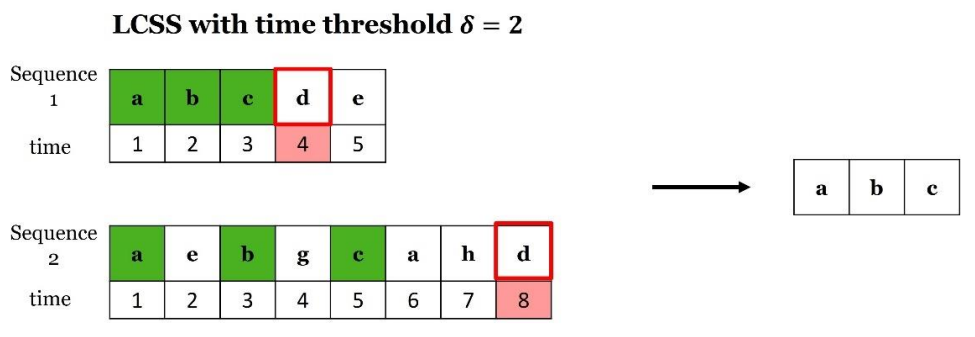

Not considering the order

In [58]:
S1 = [["A", 1], ["B",2], ["C", 3], ["D", 4], ["E", 5]]
S2 = [["A", 1], ["E", 2], ["B", 3], ["G", 4], ["C", 5], ["A", 6], ["H", 7], ["D", 8]]

(lcss_list, indicator) = LCSSR(S1, S2, 2)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")


LCSS LIST: [['A', 1], ['B', 2], ['C', 3]]
Indicator: 0.6


Considering the order

In [59]:
S1 = [["A", 1], ["B",2], ["C", 3], ["D", 4], ["E", 5]]
S2 = [["A", 1], ["E", 2], ["B", 3], ["G", 4], ["C", 5], ["A", 6], ["H", 7], ["D", 8]]

(lcss_list, indicator) = LCSSR(S1, S2, 2, order= True)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")


LCSS LIST: [['A', 1], ['B', 2], ['C', 3]]
Indicator: 0.6


##### Testing inverting the sequence in the function

ordered

In [60]:
S1 = [["A", 1], ["B",2], ["C", 3], ["D", 4], ["E", 5]]
S2 = [["A", 1], ["E", 2], ["B", 3], ["G", 4], ["C", 5], ["A", 6], ["H", 7], ["D", 8]]

(lcss_list, indicator) = LCSSR(S2, S1, 2, order= True)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")


LCSS LIST: [['A', 1], ['B', 3], ['C', 5]]
Indicator: 0.6


not ordered

In [61]:
S1 = [["A", 1], ["B",2], ["C", 3], ["D", 4], ["E", 5]]
S2 = [["A", 1], ["E", 2], ["B", 3], ["G", 4], ["C", 5], ["A", 6], ["H", 7], ["D", 8]]

(lcss_list, indicator) = LCSSR(S2, S1, 2)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")


LCSS LIST: [['A', 1], ['B', 3], ['C', 5]]
Indicator: 0.6


<!-- ### Example 3: Event ID sequences -->

### Example 3: Event ID Sequence

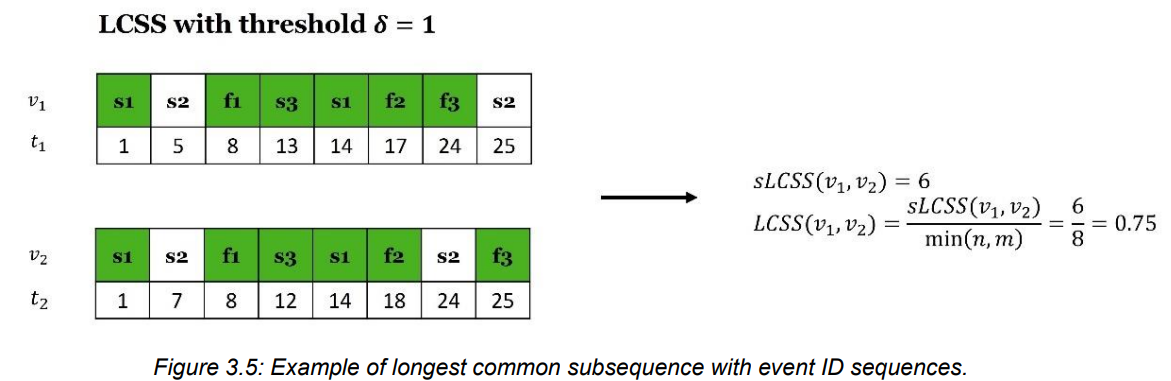

#### [S1, S2]

Not Ordered

In [77]:
S1 = [["s1", 1], ["s2",5], ["f1", 8], ["s3", 13], ["s1", 14], ["f2", 17], ["f3", 24], ["s2", 25]]
S2 = [["s1", 1], ["s2", 7], ["f1", 8], ["s3", 12], ["s1", 14], ["f2", 18], ["s2", 24], ["f3", 25]]

S1 = [[11, 1], [12,5], [21, 8], [13, 13], [11, 14], [22, 17], [23, 24], [12, 25]]
S2 = [[11, 1], [12, 7], [21, 8], [13, 12], [11, 14], [22, 18], [12, 24], [23, 25]]

(lcss_list, indicator) = LCSSR(S1, S2, delta_t= 1, eps= 0)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [[11, 1], [21, 8], [13, 13], [11, 14], [22, 17], [23, 24], [12, 25]]
Indicator: 0.875


Ordered

In [76]:
S1 = [[11, 1], [12,5], [21, 8], [13, 13], [11, 14], [22, 17], [23, 24], [12, 25]]
S2 = [[11, 1], [12, 7], [21, 8], [13, 12], [11, 14], [22, 18], [12, 24], [23, 25]]

(lcss_list, indicator) = LCSSR(S1, S2, delta_t= 1, eps= 0, order= True)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [[11, 1], [21, 8], [13, 13], [11, 14], [22, 17], [23, 24]]
Indicator: 0.75


#### [S2, S1]

Not Ordered

In [78]:
S1 = [[11, 1], [12,5], [21, 8], [13, 13], [11, 14], [22, 17], [23, 24], [12, 25]]
S2 = [[11, 1], [12, 7], [21, 8], [13, 12], [11, 14], [22, 18], [12, 24], [23, 25]]

(lcss_list, indicator) = LCSSR(S2, S1, delta_t= 1, eps= 0)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [[11, 1], [21, 8], [13, 12], [11, 14], [22, 18], [12, 24], [23, 25]]
Indicator: 0.875


Ordered

In [86]:
S1 = [[11, 1], [12,5], [21, 8], [13, 13], [11, 14], [22, 17], [23, 24], [12, 25]]
S2 = [[11, 1], [12, 7], [21, 8], [13, 12], [11, 14], [22, 18], [12, 24], [23, 25]]

(lcss_list, indicator) = LCSSR(S2, S1, delta_t= 1, eps= 0, order= True)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [[11, 1], [21, 8], [13, 12], [11, 14], [22, 18], [12, 24]]
Indicator: 0.75


### Example 4: KPI Sequences

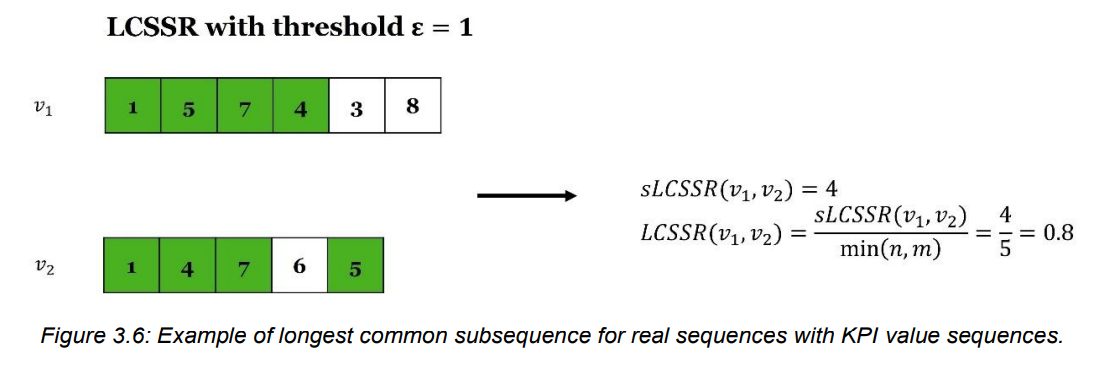

The error should a percentage of the lowest difference between KPI. Having higher errors can lead to difference when comparing sequence if differente orders (S1, S1) or (S2, S1)

#### [S1 , S2]

Not Ordered

In [91]:
S1 = [[1, 1], [5,2], [7, 3], [4, 4], [3, 5], [8, 6]]
S2 = [[1, 1], [4, 2], [7, 3], [6, 4], [5, 5]]

(lcss_list, indicator) = LCSSR(S1, S2, delta_t= 1, eps= 1)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [[1, 1], [5, 2], [7, 3], [4, 4]]
Indicator: 0.8


Ordered

In [81]:
S1 = [[1, 1], [5,2], [7, 3], [4, 4], [3, 5], [8, 6]]
S2 = [[1, 1], [4, 2], [7, 3], [6, 4], [5, 5]]

(lcss_list, indicator) = LCSSR(S1, S2, delta_t= 1000, eps= 1, order= True)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [[1, 1], [5, 2], [7, 3], [4, 4]]
Indicator: 0.8


#### [S2, S1]

Not Ordered

In [96]:
S1 = [[10, 1], [50,2], [70, 3], [40, 4], [30, 5], [80, 6]]
S2 = [[9, 1], [52, 2], [73, 3], [60, 4], [77, 5]]

(lcss_list, indicator) = LCSSR(S2, S1, delta_t= 1, eps= 15)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [[9, 1], [52, 2], [73, 3], [60, 4], [77, 5]]
Indicator: 1.0


In [97]:
S1 = [[10, 1], [50,2], [70, 3], [40, 4], [30, 5], [80, 6]]
S2 = [[9, 1], [52, 2], [73, 3], [60, 4], [77, 5]]

(lcss_list, indicator) = LCSSR(S1, S2, delta_t= 1, eps= 15)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [[10, 1], [50, 2], [70, 3], [80, 6]]
Indicator: 0.8


Ordered

In [85]:
S1 = [[1, 1], [5,2], [7, 3], [4, 4], [3, 5], [8, 6]]
S2 = [[1, 1], [4, 2], [7, 3], [6, 4], [5, 5]]

(lcss_list, indicator) = LCSSR(S2, S1, delta_t= 1, eps= 1, order= True)
print (f"LCSS LIST: {lcss_list}")
print(f"Indicator: {indicator}")

LCSS LIST: [[1, 1], [4, 2], [7, 3], [6, 4], [5, 5]]
Indicator: 1.0
